In [5]:
url = 'https://raw.githubusercontent.com/washingtonpost/data-school-shootings/refs/heads/master/school-shootings-data.csv'

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [23]:
df = pd.read_csv(url)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               416 non-null    int64  
 1   nces_school_id                    410 non-null    object 
 2   school_name                       416 non-null    object 
 3   nces_district_id                  392 non-null    float64
 4   district_name                     391 non-null    object 
 5   date                              416 non-null    object 
 6   school_year                       416 non-null    object 
 7   year                              416 non-null    int64  
 8   time                              386 non-null    object 
 9   day_of_week                       416 non-null    object 
 10  city                              416 non-null    object 
 11  state                             416 non-null    object 
 12  school_t

In [27]:
# Filling missing values for numeric columns with the mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Filling missing values for string (object) columns with the mode
string_columns = df.select_dtypes(include=['object']).columns
for column in string_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Verify if all missing values are handled
print(df.isnull().sum())

uid                                 0
nces_school_id                      0
school_name                         0
nces_district_id                    0
district_name                       0
date                                0
school_year                         0
year                                0
time                                0
day_of_week                         0
city                                0
state                               0
school_type                         0
enrollment                          0
killed                              0
injured                             0
casualties                          0
shooting_type                       0
age_shooter1                        0
gender_shooter1                     0
race_ethnicity_shooter1             0
shooter_relationship1               0
shooter_deceased1                   0
deceased_notes1                     0
age_shooter2                        0
gender_shooter2                     0
race_ethnici

In [34]:
import numpy as np

# Selecting our categorical columns
data_column_category = df.select_dtypes(exclude=[np.number]).columns

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Apply one-hot encoding to be able to use the data for analysis.
for col in data_column_category:
    df[col] = label_encoder.fit_transform(df[col])

In [36]:
df

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,67,70,804800.0,142,264,0,1999,18,3,...,39.603910,-105.075000,89.600000,9,2,169,96,8,8059,21.0
1,2,160,316,2200540.0,95,267,0,1999,38,2,...,30.529958,-91.169966,39.000000,6,7,203,61,22,22033,12.0
2,3,120,142,1304410.0,263,306,0,1999,107,2,...,33.626922,-84.047960,84.000000,9,2,27,175,13,13247,21.0
3,4,294,163,4218990.0,230,88,1,1999,0,1,...,39.921509,-75.234108,41.000000,9,2,86,159,42,42101,11.0
4,5,181,90,2502790.0,27,119,1,1999,99,4,...,42.285268,-71.075901,61.911803,9,2,220,201,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,418,81,93,1100030.0,88,315,25,2024,138,0,...,38.907695,-77.012836,60.500000,9,2,232,56,11,11001,11.0
412,419,384,231,5509990.0,194,290,25,2024,12,4,...,43.006314,-89.728462,41.730000,6,7,246,49,55,55025,31.0
413,420,252,261,3701500.0,323,319,25,2024,29,3,...,36.057000,-80.257100,89.640000,9,2,51,70,37,37067,12.0
414,421,375,120,5307710.0,282,329,25,2024,41,0,...,47.605000,-122.301900,68.200000,9,2,251,101,53,53033,11.0


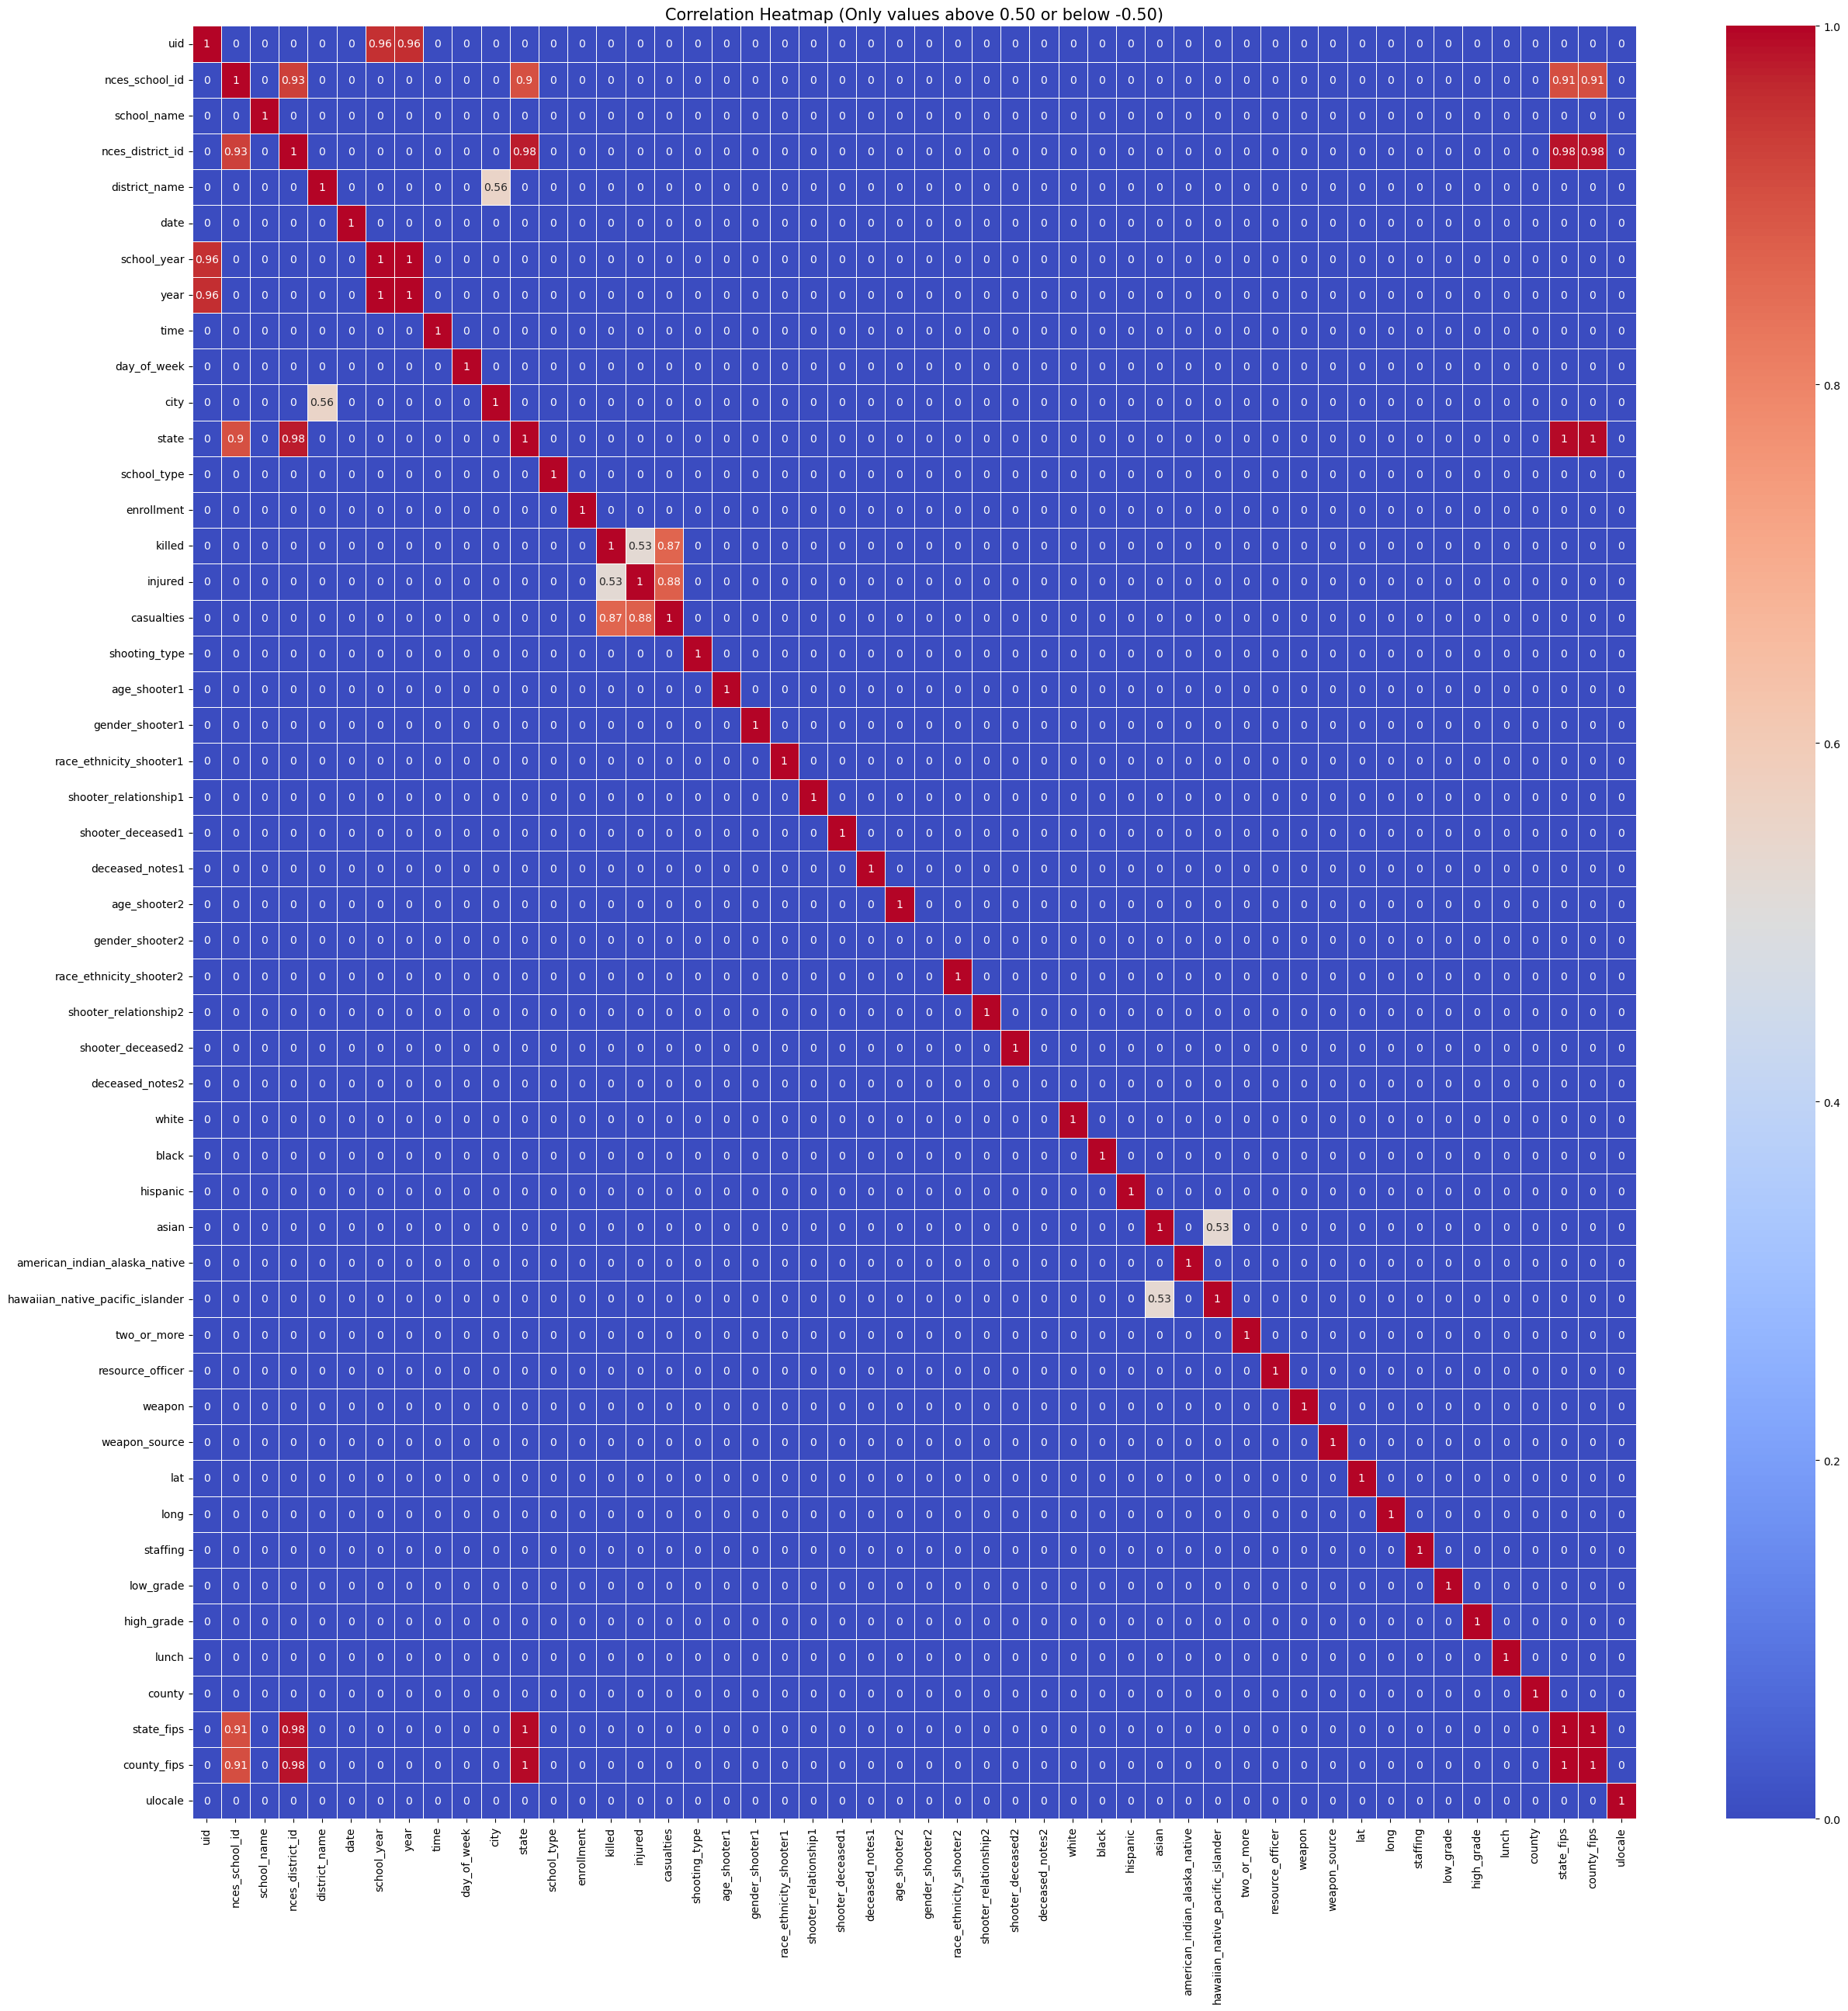

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix (normal values)
corr_matrix = df.corr()

# Filter the correlation matrix to show only values above 0.50 or below -0.50
filtered_corr_matrix = corr_matrix[(corr_matrix > 0.50) | (corr_matrix < -0.50)].fillna(0)

# Set up the figure size
plt.figure(figsize=(30, 30))

# Create a heatmap using seaborn
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap (Only values above 0.50 or below -0.50)', size=15)

# Show the plot
plt.show()
